<a href="https://colab.research.google.com/github/jesvin1/Options/blob/master/Option_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

People or institutions selling options are called option
writers. Those buying options are called option holders.

For a European call option on an index with strike 8,000 and index level of 8,200
at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
USD) from the option writer. If the index level is below the strike, say at 7,800, the option
expires worthless and the writer does not have to pay anything. We can formalize this via
the so-called inner value (or intrinsic value or payoff)—from the holder’s viewpoint—of
the option

hT(S, K) = max[ST− K, 0]

where T is the maturity date of the option, 
      ST the index level at this date and K represents the
strike price. 

We can now use Python for the first time and plot this inner value function.


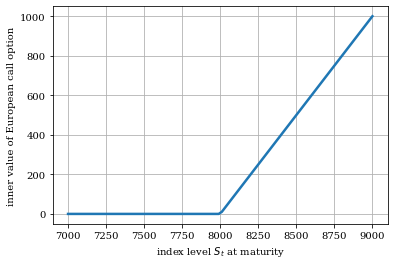

In [0]:
#
# European Call Option Inner Value Plot
# 02_MBV/inner_value_plot.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

# Option Strike
K = 8000
# Graphical Output
S = np.linspace(7000, 9000, 100)# index level values
h = np.maximum(S - K, 0)# inner values of call option
plt.figure()
plt.plot(S, h, lw=2.5)# plot inner values at maturity
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.grid(True)


Three scenarios have to be distinguished with regard to the so-called moneyness of an
option:

in-the-money (ITM): a call (put) is in-the-money if S > K (S < K)

at-the-money (ATM): an option, call or put, is at-the-money if S ≈ K

out-of-the-money (OTM): a call (put) is out-of-the-money if S < K (S > K)

Factors affecting Option

1. initial index level
2. volatility of the index
3. time-to-maturity
4. interest rate

These above insights are formalized in the seminal work of Black-Scholes-Merton (cf.
Black and Scholes (1973) and Merton (1973)) who for the first time derived a closed option
pricing formula for a parsimonious set of input parameters. Their formula says mainly the
following

C∗
 = CBSM(S0, K, T, r, 𝜎)

1. S0the current index level
2. K the strike price of the option
3. T the maturity date (equals time-to-maturity viewed from the present date)
4. r the constant risk-less short rate
5. 𝜎 the volatility of the index, i.e. the standard deviation of the index level returns

So we can say option’s present value is composed of the inner value plus the time value







In [0]:
#!git clone https://github.com/yhilpisch/dawp.git
#%cd dawp
#conda env create -f dawp_conda.yml
#!source activate dawp
#%cd python36


/bin/bash: conda: command not found


In [1]:
#%cd ..
!pwd
!ls

/content
sample_data


In [2]:
!pip install git+https://github.com/yhilpisch/dawp.git

  Cloning https://github.com/yhilpisch/dawp.git to /tmp/pip-req-build-r8wxmc0q
  Running command git clone -q https://github.com/yhilpisch/dawp.git /tmp/pip-req-build-r8wxmc0q
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [0]:
#
# Black-Scholes-Merton (1973) European Call & Put Valuation
# 05_com/BSM_option_valuation.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad
mpl.rcParams['font.family'] = 'serif'

#
# Helper Functions
#


def dN(x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)


def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]


def d1f(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.
        Parameters see e.g. BSM_call_value function. '''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
          * (T - t)) / (sigma * math.sqrt(T - t))
    return d1

#
# Valuation Functions
#


def BSM_call_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    call_value : float
        European call present value at t
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value


def BSM_put_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European put option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    put_value : float
        European put present value at t
    '''
    put_value = BSM_call_value(St, K, t, T, r, sigma) \
        - St + math.exp(-r * (T - t)) * K
    return put_value


#
# Plotting European Option Values
#


def plot_values(function):
    ''' Plots European option values for different parameters c.p. '''
    plt.figure(figsize=(10, 8.3))
    points = 100
    #
    # Model Parameters
    #
    St = 100.0  # index level
    K = 100.0  # option strike
    t = 0.0  # valuation date
    T = 1.0  # maturity date
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility

    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')

    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')

    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')

    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

Text(0, 0.5, 'present value $C(t=0)$')

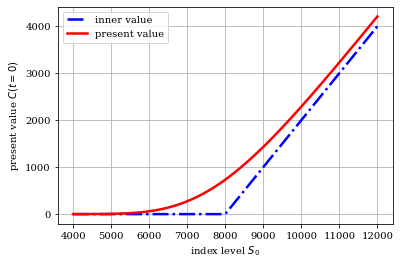

In [4]:
#
# European Call Option Value Plot
# 02_mbv/BSM_value_plot.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
# Import Valuation Function from Chapter 5
import sys
sys.path.append('05_com')
#from BSM_option_valuation import BSM_call_value
# Model and Option Parameters
K = 8000# strike price
T = 1.0# time-to-maturity
r = 0.025# constant, risk-less short rate
vol = 0.2# constant volatility
# Sample Data Generation
S = np.linspace(4000, 12000, 150)# vector of index level values
h = np.maximum(S - K, 0)# inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]
# calculate call option values
# Graphical Output
plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
# plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')


VANILLA VS. EXOTIC INSTRUMENTS

 plain vanilla or flow equity derivatives, like European
call options written on an equity index

 exotic equity derivatives, like options on an equity
index with Asian features, barriers and/or American exercise.

 exist liquid
markets for plain vanilla products but not for exotic ones


